In [2]:
import pandas as pd
import plotnine as p9
df = pd.read_parquet("features.parquet")
df.target = df.target.map(bool)
df.columns

Index(['id', 'keyword', 'location', 'text', 'hashtag',
       'hashtags_have_l1_synonyms', 'hashtags_have_l2_synonyms', 'subj',
       'verb', 'obj', 'contains_l1_synonyms', 'contains_l2_synonyms',
       'contains_damaged_words', 'mentioned_news_org', 'mentioned_relief_org',
       'mentions', 'orgs', 'gpes', 'facs', 'target'],
      dtype='object')

# Feature selection

### General statistics about the features:

In [2]:
num_total = df.shape[0]
def pct_with_value_for_col(column_name, df):
    def to_bool(cell):
        from numpy import ndarray as nparr
        placeholder = '_'
        
        if type(cell) == nparr:
            if len(cell) == 1 and cell.tolist() == [placeholder]:
                return False
            else:
                return True
        return bool(cell)
        
    try:
        num = df[column_name].map(to_bool).value_counts()[True]
        return round(float(num)/num_total*100, 2)
    except KeyError:
        return 0

print("Percentage of dataset with values for the specified columns:")
for col in df.columns:
    if col not in ['id', 'text', 'target']:
        print(f"Value for {col}: {pct_with_value_for_col(col, df)}%")

Percentage of dataset with values for the specified columns:
Value for keyword: 100.0%
Value for location: 66.92%
Value for hashtag: 22.44%
Value for hashtags_have_l1_synonyms: 0.12%
Value for hashtags_have_l2_synonyms: 0.03%
Value for subj: 52.9%
Value for verb: 79.23%
Value for obj: 79.39%
Value for contains_l1_synonyms: 12.58%
Value for contains_l2_synonyms: 5.1%
Value for contains_damaged_words: 8.0%
Value for mentioned_news_org: 0.95%
Value for mentioned_relief_org: 0.04%
Value for mentions: 25.4%
Value for orgs: 59.72%
Value for gpes: 15.19%
Value for facs: 1.73%


### Keywords and their indication of label

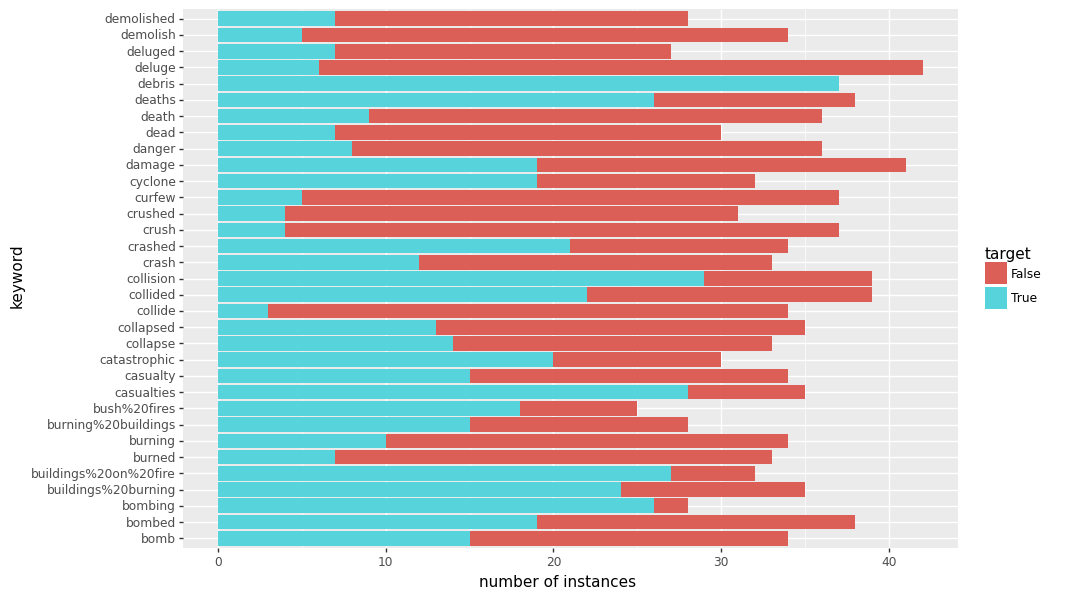

<ggplot: (313302213)>

In [21]:
plotdf = pd.DataFrame({'keyword': df.keyword, 'target': df.target})
wanted_kwds = ["demolished", "demolish", "deluged", "deluge", "debris", "deaths", "death", "dead", "danger", "damage", "cyclone", "curfew", "crushed", "crush", "crashed", "crash", "collision", "collided", "collide", "collapsed", "collapse", "diff%20fall", "chemical%emergency", "catastrophic", "catastrophy", "casualty", "casualties", "bush%20fires", "burning%20buildings", "burning", "burned", "buildings%20on%20fire", "buildings%20burning", "bridge%collapse", "bombing", "bombed", "bomb"]
(p9.ggplot(plotdf[plotdf.keyword.isin(wanted_kwds)])
 + p9.aes(x='keyword', fill='target')
 + p9.geom_bar()
 + p9.ylab('number of instances')
 + p9.coord_flip()
 + p9.theme(figure_size=(10, 7))
)

### Does a non-empty location indicate a specific labelling?

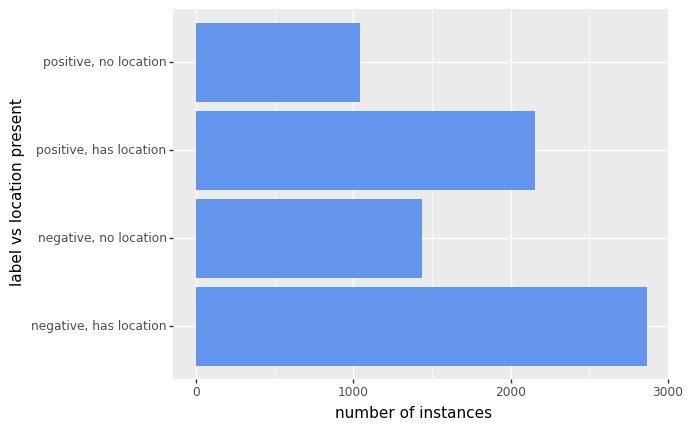

<ggplot: (276561077)>

In [4]:
combinations = [['positive, has location', 'target == 1 and location != ""'], 
                ['positive, no location', 'target == 1 and location == ""'],
                ['negative, has location', 'target == 0 and location != ""'], 
                ['negative, no location', 'target == 0 and location == ""']]

(p9.ggplot(pd.DataFrame({'features': [x[0] for x in combinations],
                        'count': [df.query(x[1]).shape[0] for x in combinations]},
                       columns=['features', 'count']))
 + p9.aes(x='features', y='count')
 + p9.geom_col(fill='cornflowerblue')
 + p9.ylab("number of instances")
 + p9.xlab("label vs location present")
 + p9.coord_flip()
)

### Mentions of news organisations and implications for labelling

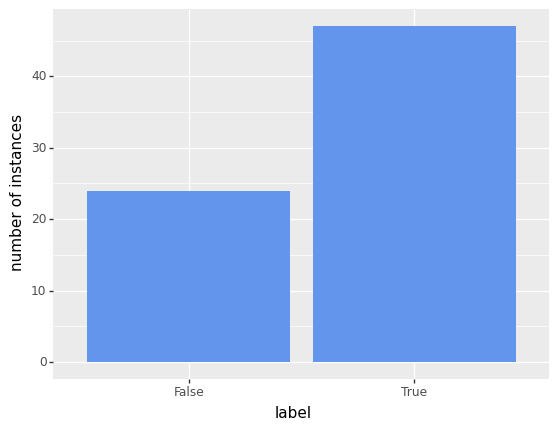

<ggplot: (314023873)>

In [5]:
(p9.ggplot(df[df.mentioned_news_org])
 + p9.aes(x='target')
 + p9.xlab('label')
 + p9.ylab('number of instances')
 + p9.geom_bar(fill='cornflowerblue')
)

### Mentions of relief organisations and implications for labelling

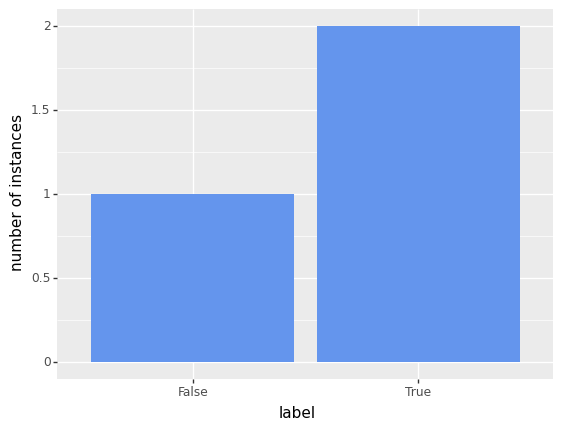

<ggplot: (276560941)>

In [6]:
(p9.ggplot(df[df.mentioned_relief_org])
 + p9.aes(x='target')
 + p9.xlab('label')
 + p9.ylab('number of instances')
 + p9.geom_bar(fill='cornflowerblue')
)

### Correlation between containing l1 synonyms and labelling

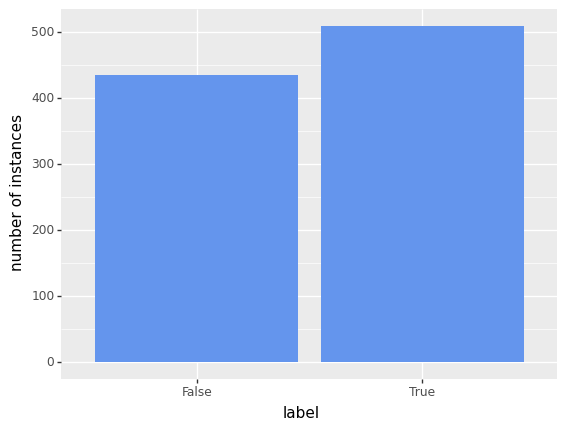

<ggplot: (314900681)>

In [7]:
(p9.ggplot(df[df.contains_l1_synonyms])
 + p9.aes(x='target')
 + p9.xlab('label')
 + p9.ylab('number of instances')
 + p9.geom_bar(fill='cornflowerblue')
)

### Correlation between containing l2 synonyms and labelling

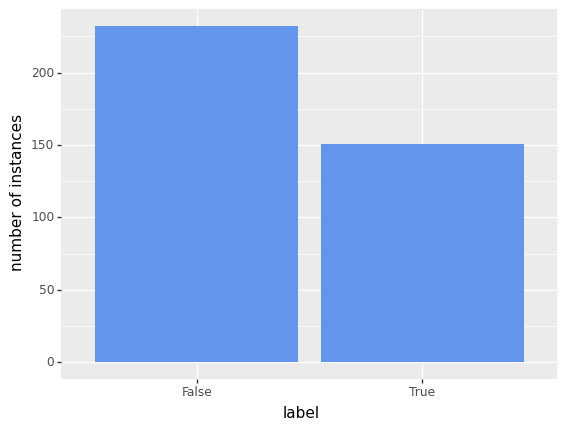

<ggplot: (315259233)>

In [8]:
(p9.ggplot(df[df.contains_l2_synonyms])
 + p9.aes(x='target')
 + p9.xlab('label')
 + p9.ylab('number of instances')
 + p9.geom_bar(fill='cornflowerblue')
)

### Correlation between containing words relating to damage and labelling

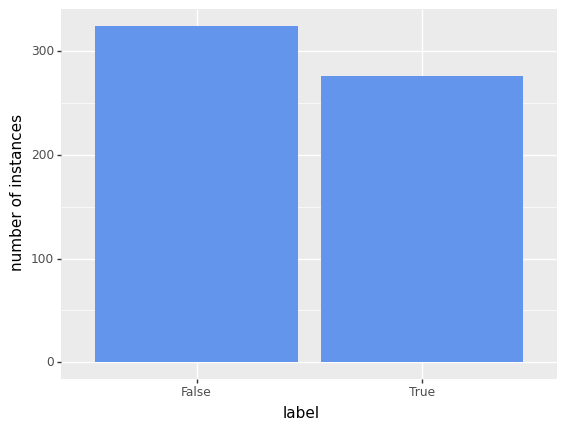

<ggplot: (310714701)>

In [9]:
(p9.ggplot(df[df.contains_damaged_words])
 + p9.aes(x='target')
 + p9.xlab('label')
 + p9.ylab('number of instances')
 + p9.geom_bar(fill='cornflowerblue')
)

### Does the number of entities indicate a labelling?

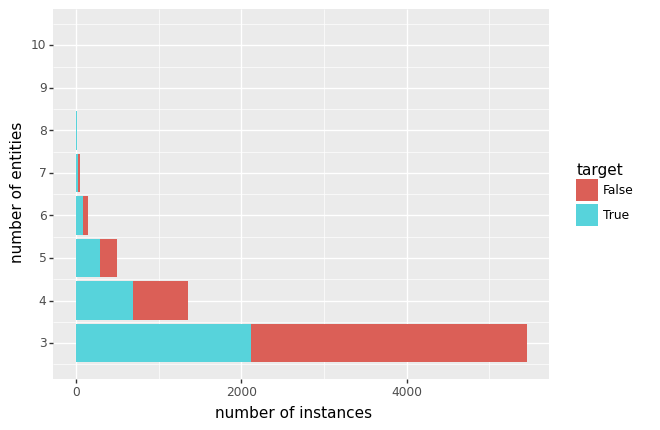

<ggplot: (315586341)>

In [10]:
plotdf = pd.DataFrame(columns=['num_ents', 'target'])
plotdf.num_ents = df.apply(lambda x: len(x.orgs)+len(x.gpes)+len(x.facs), axis='columns')
plotdf.target = df.target

(p9.ggplot(plotdf)
 + p9.aes(x='num_ents', fill='target')
 + p9.geom_bar()
 + p9.scale_x_continuous(breaks=range(0,plotdf.num_ents.max()+1))
 + p9.xlab('number of entities')
 + p9.ylab('number of instances')
 + p9.coord_flip()
)


### What about the number of hashtags?

In [11]:
plotdf = pd.DataFrame(columns=['num_hashtags', 'target'])
plotdf.num_hashtags = df.apply(lambda x: len(x.hashtag), axis='columns')
plotdf.target = df.target

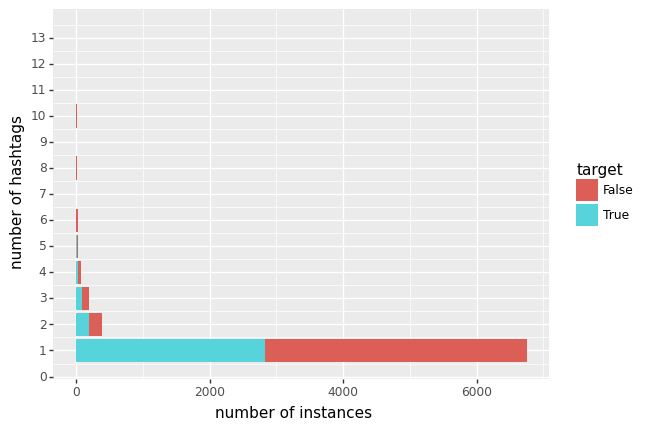

<ggplot: (315793489)>

In [12]:
(p9.ggplot(plotdf)
 + p9.aes(x='num_hashtags', fill='target')
 + p9.geom_bar()
 + p9.xlab('number of hashtags')
 + p9.ylab('number of instances')
 + p9.scale_x_continuous(breaks=range(0,plotdf.num_hashtags.max()+1))
 + p9.coord_flip()
)

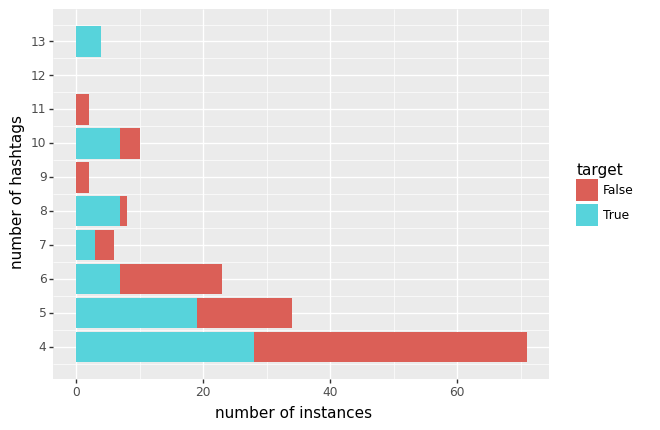

<ggplot: (313156637)>

In [13]:
(p9.ggplot(plotdf[plotdf.num_hashtags >= 4])
  + p9.aes(x='num_hashtags', fill='target')
  + p9.geom_bar()
  + p9.xlab('number of hashtags')
  + p9.ylab('number of instances')
  + p9.scale_x_continuous(breaks=range(4,plotdf.num_hashtags.max()+1))
  + p9.coord_flip()
)

### What about synonyms present in hashtags?

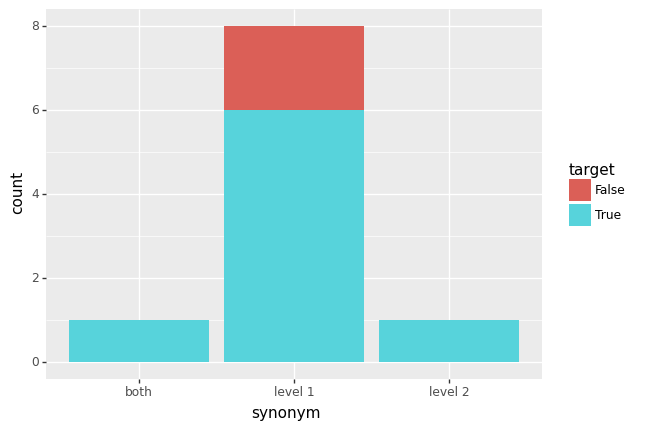

<ggplot: (313340785)>

In [14]:
def join_cols(row):
    if row.hashtags_have_l1_synonyms and row.hashtags_have_l2_synonyms:
        return 'both'
    if not row.hashtags_have_l1_synonyms and row.hashtags_have_l2_synonyms:
        return 'level 2'
    if row.hashtags_have_l1_synonyms and not row.hashtags_have_l2_synonyms:
        return 'level 1'
    return 'none'

plotdf = pd.DataFrame({'synonym': df.apply(join_cols, axis='columns'),
                       'target': df.target
                      })


(p9.ggplot(plotdf[plotdf.synonym != 'none'])
 + p9.aes(x='synonym', fill='target')
 + p9.geom_bar())

In [15]:
hashtags = list({val.lower() for sublist in df.hashtag.tolist() for val in sublist if val != '_'})
plotdf = pd.DataFrame({'hashtag': hashtags}, columns=['hashtag', 'true', 'false'])

### Trying to see most popular hashtags by class
This is slooow...I write inefficient code w00t

In [16]:
from tqdm import tqdm
def calc_stats(row):
    num_positive = df[df.hashtag.map(lambda x: row.hashtag in [ht.lower() for ht in x])].query("target").shape[0]
    num_negative = df[df.hashtag.map(lambda x: row.hashtag in [ht.lower() for ht in x])].query("not target").shape[0]
    return [row.hashtag, num_positive, num_negative]

tqdm.pandas()
plotdf = plotdf.progress_apply(calc_stats, axis='columns', result_type="broadcast")
plotdf.hashtag = plotdf.hashtag.map(lambda x: str(x)[1:].lower())

/Users/alex/.config/virtualenvs/ml/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1916/1916 [15:22<00:00,  2.08it/s]


In [83]:
top_n = 30
most_popular_hashtags_true = plotdf.astype({'hashtag': 'str', 'true': 'int32', 'false': 'int32'}).nlargest(top_n, 'true')

(p9.ggplot(most_popular_hashtags_true.melt(id_vars='hashtag', var_name='label')) 
 + p9.aes(x='hashtag', y='value', fill='label') 
 + p9.geom_col()
 + p9.ylab("number of occurrences")
 + p9.coord_flip()
)

/Users/alex/.config/virtualenvs/ml/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/alex/.config/virtualenvs/ml/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/top-30-hashtags-true.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


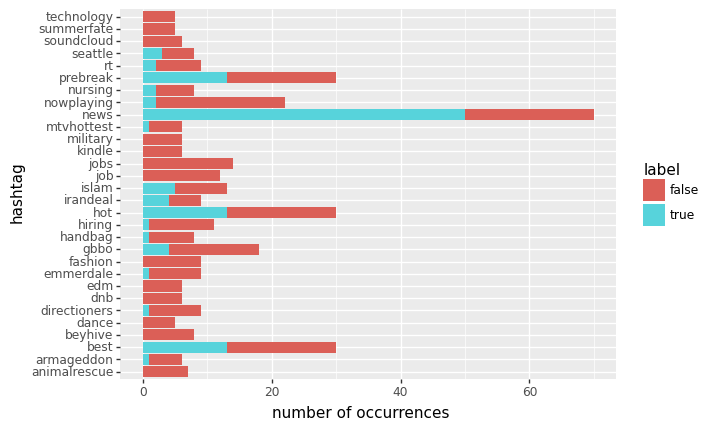

<ggplot: (318276197)>

In [85]:
most_popular_hashtags_false = plotdf.astype({'hashtag': 'str', 'true': 'int32', 'false': 'int32'}).nlargest(top_n, 'false')

(p9.ggplot(most_popular_hashtags_false.melt(id_vars='hashtag', var_name='label')) 
 + p9.aes(x='hashtag', y='value', fill='label')
 + p9.geom_col()
 + p9.ylab("number of occurrences")
 + p9.coord_flip()
)

In [75]:
set(most_popular_hashtags_true.hashtag.tolist()).intersection(set(most_popular_hashtags_false.hashtag.tolist()))

{'best', 'hot', 'news', 'prebreak'}